In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
import time
import rebound
import matplotlib.pyplot as plt
import numpy as np
import vanillaWH_bruteforce_3body
import integrator_tools
import vanillaWH

%matplotlib inline

# configuring plots
#plt.rc('text', usetex=True)            # use LaTeX for text
plt.rc('font', family='serif')          # use serif font
plt.rcParams.update({'font.size': 14})  # increase font size

In [13]:
# initial conditions from Mikkola 1997
# particle array as [x, y, z, vx, vy, vz, m]
p0 = np.array([0., 0., 0., 0., 0., 0., 1.])
p1 = np.array([-2., 0., 0., 0., -0.7, 0., 2.])
p2 = np.array([0., 60., 0.01, -0.095, 0., 0.01, 0.9])

#p0 = np.array([0., 0., 0., 0., 0., 0., 1.])
#p1 = np.array([1., 0., 0., 0., 1., 0., 1e-3])
#p2 = np.array([2., 0., 0., 0., 0.7, 0., 1e-3])

sim_jacobi = np.stack([p0, p1, p2])
masses = sim_jacobi[:,-1]

sim = integrator_tools.jacobi_to_inertial(sim_jacobi, masses)
print(np.round(sim, 12))
for i in range(sim.shape[0]):
    i_txt = ""
    for j in range(sim.shape[1]-1):
        i_txt += str(np.round(sim[i,j], 12)) + " "
    i_txt += "\n"
    print(i_txt)

sim_jacobi = integrator_tools.inertial_to_jacobi(sim)

binary_period = 2*np.pi*np.sqrt(1.195219123505976**3 / 3)
binary_period = 4.73

N_orbits = 100
steps_per_orbit = 30
timestep = 1./steps_per_orbit * binary_period
N_steps = N_orbits*steps_per_orbit

energy_error = np.zeros(N_steps)
E0 = integrator_tools.energy_fn(sim)

orbit_soln = np.zeros((len(sim_jacobi), 3, N_steps)) # [object, position, N_steps]
orbit_soln[:,0,0], orbit_soln[:,1,0], orbit_soln[:,2,0] = sim_jacobi[:,0], sim_jacobi[:,1], sim_jacobi[:,2]

start = time.time()

for i in range(N_steps):
    
    # drift
    sim_jacobi = vanillaWH_bruteforce_3body.drift(sim_jacobi, sim, h=timestep/2)
    sim = integrator_tools.jacobi_to_inertial(sim_jacobi, masses)
    
    # kick
    sim_jacobi = vanillaWH_bruteforce_3body.kick(sim_jacobi, sim, h=timestep)
    
    # drift
    sim_jacobi = vanillaWH_bruteforce_3body.drift(sim_jacobi, sim, h=timestep/2)
    sim = integrator_tools.jacobi_to_inertial(sim_jacobi, masses)

    E = integrator_tools.energy_fn(sim)
    energy_error[i] = (E-E0)/E0

    orbit_soln[:, 0, i] = sim_jacobi[:,0]
    orbit_soln[:, 1, i] = sim_jacobi[:,1]
    orbit_soln[:, 2, i] = sim_jacobi[:,2]

end = time.time()

print('time to integrate =', np.round(end - start, 1), 's')

[[ 1.33333333e+00 -1.38461538e+01 -2.30769231e-03  2.19230769e-02
   4.66666667e-01 -2.30769231e-03  1.00000000e+00]
 [-6.66666667e-01 -1.38461538e+01 -2.30769231e-03  2.19230769e-02
  -2.33333333e-01 -2.30769231e-03  2.00000000e+00]
 [ 0.00000000e+00  4.61538462e+01  7.69230769e-03 -7.30769231e-02
   0.00000000e+00  7.69230769e-03  9.00000000e-01]]
1.333333333333 -13.846153846154 -0.002307692308 0.021923076923 0.466666666667 -0.002307692308 

-0.666666666667 -13.846153846154 -0.002307692308 0.021923076923 -0.233333333333 -0.002307692308 

0.0 46.153846153846 0.007692307692 -0.073076923077 0.0 0.007692307692 

time to integrate = 16.8 s


In [9]:
print(400*30/binary_period)

2536.997885835095


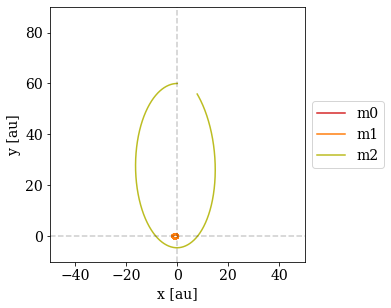

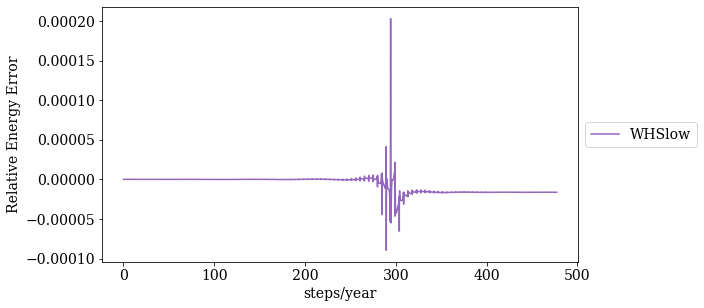

In [11]:
orbital_periods = np.arange(N_steps)/ (2*np.pi)

plt.figure(figsize=(10,4.5))
plt.plot(orbit_soln[0,0], orbit_soln[0,1], label='m0', c='tab:red')
plt.plot(orbit_soln[1,0], orbit_soln[1,1], label='m1', c='tab:orange')
plt.plot(orbit_soln[2,0], orbit_soln[2,1], label='m2', c='tab:olive')

plt.axhline(0, ls='--', alpha=0.2, c='black')
plt.axvline(0, ls='--', alpha=0.2, c='black')
plt.axis('scaled')
plt.xlim(-50,50)
plt.ylim(-10,90)
plt.xlabel('x [au]')
plt.ylabel('y [au]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
#plt.savefig('SS.jpg', dpi=300)
plt.show()

plt.figure(figsize=(10,4.5))
plt.plot(orbital_periods, energy_error, label='WHSlow', c='tab:purple')
#plt.yscale('log')
#plt.ylim(-6e-5, 6e-5)
plt.xlabel('steps/year')
plt.ylabel('Relative Energy Error')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
#plt.savefig('SS_energy_error.jpg', dpi=300)
plt.show()

energy_error2 = np.copy(energy_error)

In [11]:
# initial conditions from Mikkola 1997
# particle array as [x, y, z, vx, vy, vz, m]
p0 = np.array([0., 0., 0., 0., 0., 0., 1.])
p1 = np.array([-2., 0., 0., 0., -0.7, 0., 2.])
p2 = np.array([0., 60., 0.01, -0.095, 0., 0.01, 0.9])

#p0 = np.array([0., 0., 0., 0., 0., 0., 1.])
#p1 = np.array([1., 0., 0., 0., 1., 0., 1e-3])
#p2 = np.array([2., 0., 0., 0., 0.7, 0., 1e-3])

sim_jacobi = np.stack([p0, p1, p2])
masses = sim_jacobi[:,-1]

sim = integrator_tools.jacobi_to_inertial(sim_jacobi, masses)

binary_period = 2*np.pi*np.sqrt(1.195219123505976**3 / 3)
binary_period = 4.73

N_orbits = 400
steps_per_orbit = 30
timestep = 1./steps_per_orbit * binary_period
N_steps = N_orbits*steps_per_orbit

energy_error = np.zeros(N_steps)
E0 = integrator_tools.energy_fn(sim)

orbit_soln = np.zeros((len(sim_jacobi), 3, N_steps)) # [object, position, N_steps]
orbit_soln[:,0,0], orbit_soln[:,1,0], orbit_soln[:,2,0] = sim_jacobi[:,0], sim_jacobi[:,1], sim_jacobi[:,2]

start = time.time()

for i in range(N_steps):
    
    # drift
    #sim_jacobi = vanillaWH_bruteforce_3body.drift(sim_jacobi, sim, h=timestep/2)
    sim_jacobi = vanillaWH.drift(sim_jacobi, sim, h=timestep/2)
    sim = integrator_tools.jacobi_to_inertial(sim_jacobi, masses)
    
    # kick
    sim_jacobi = vanillaWH.kick(sim_jacobi, sim, h=timestep)
    
    # drift
    sim_jacobi = vanillaWH.drift(sim_jacobi, sim, h=timestep/2)
    sim = integrator_tools.jacobi_to_inertial(sim_jacobi, masses)

    E = integrator_tools.energy_fn(sim)
    energy_error[i] = (E-E0)/E0

    orbit_soln[:, 0, i] = sim_jacobi[:,0]
    orbit_soln[:, 1, i] = sim_jacobi[:,1]
    orbit_soln[:, 2, i] = sim_jacobi[:,2]

end = time.time()

print('time to integrate =', np.round(end - start, 1), 's')

time to integrate = 6.6 s


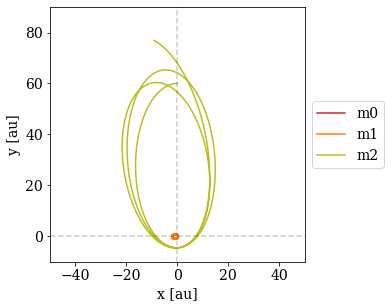

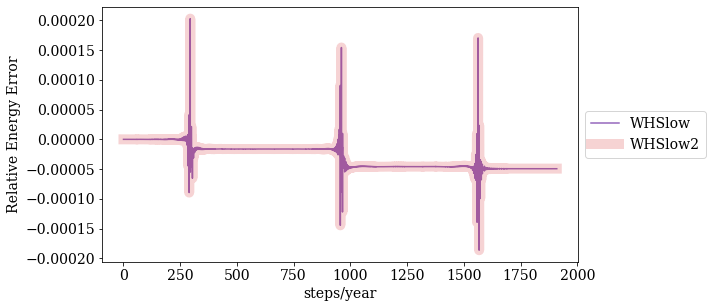

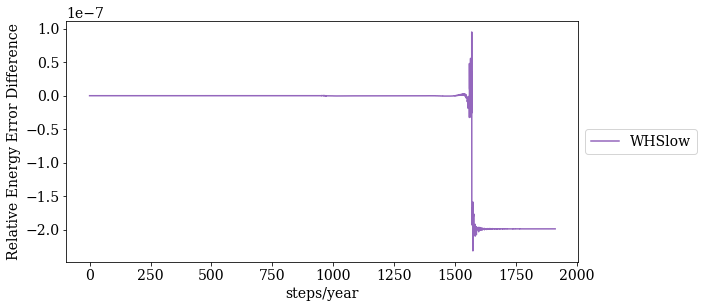

In [12]:
plt.figure(figsize=(10,4.5))
plt.plot(orbit_soln[0,0], orbit_soln[0,1], label='m0', c='tab:red')
plt.plot(orbit_soln[1,0], orbit_soln[1,1], label='m1', c='tab:orange')
plt.plot(orbit_soln[2,0], orbit_soln[2,1], label='m2', c='tab:olive')
plt.axhline(0, ls='--', alpha=0.2, c='black')
plt.axvline(0, ls='--', alpha=0.2, c='black')
plt.axis('scaled')
plt.xlim(-50,50)
plt.ylim(-10,90)
plt.xlabel('x [au]')
plt.ylabel('y [au]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
#plt.savefig('SS.jpg', dpi=300)
plt.show()

plt.figure(figsize=(10,4.5))
plt.plot(orbital_periods, energy_error, label='WHSlow', c='tab:purple')
plt.plot(orbital_periods, energy_error2, label='WHSlow2', lw=10, alpha=0.2, c='tab:red')
#plt.yscale('log')
#plt.ylim(-6e-5, 6e-5)
plt.xlabel('steps/year')
plt.ylabel('Relative Energy Error')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
#plt.savefig('SS_energy_error.jpg', dpi=300)
plt.show()

plt.figure(figsize=(10,4.5))
plt.plot(orbital_periods, energy_error-energy_error2, label='WHSlow', c='tab:purple')
#plt.yscale('log')
#plt.ylim(-6e-5, 6e-5)
plt.xlabel('steps/year')
plt.ylabel('Relative Energy Error Difference')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
#plt.savefig('SS_energy_error.jpg', dpi=300)
plt.show()
